<a href="https://colab.research.google.com/github/HoaiNam52/NguyenHoaiNam_19146219_BT_AI/blob/main/Traicay_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Traicay/training_data',
                                               target_size=(100,100),
                                               batch_size=128,
                                               class_mode ='categorical',
                                               subset = 'training',
                                               shuffle = True)
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Traicay/training_data',
                                               target_size=(100,100),
                                               batch_size=128,
                                               class_mode ='categorical',
                                               subset = 'validation',
                                               shuffle = True)
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Traicay/testing_data',
                                               target_size=(100,100),
                                               batch_size=128,
                                               class_mode ='categorical')

Found 90 images belonging to 10 classes.
Found 9 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(training_set,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 1.4933 - accuracy: 0.5778 - val_loss: 2.9070 - val_accuracy: 0.1111
Epoch 2/50
1/1 [==============================] - 10s 10s/step - loss: 2.4643 - accuracy: 0.2111 - val_loss: 2.0517 - val_accuracy: 0.1111
Epoch 3/50
1/1 [==============================] - 10s 10s/step - loss: 1.8634 - accuracy: 0.2556 - val_loss: 1.6277 - val_accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 10s 10s/step - loss: 1.6678 - accuracy: 0.4222 - val_loss: 1.8137 - val_accuracy: 0.4444
Epoch 5/50
1/1 [==============================] - 10s 10s/step - loss: 1.5958 - accuracy: 0.4222 - val_loss: 1.6482 - val_accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 10s 10s/step - loss: 1.6829 - accuracy: 0.4333 - val_loss: 1.5073 - val_accuracy: 0.4444
Epoch 7/50
1/1 [==============================] - 10s 10s/step - loss: 1.5860 - accuracy: 0.4556 - val_loss: 1.4675 - val_accuracy: 0.5556
Epoch 8/50
1/1 [===========

In [29]:
model.save("Traicay_CNN.h5")

In [10]:
training_set.class_indices

{'apple': 0,
 'banana': 1,
 'carrot': 2,
 'lemon': 3,
 'onion': 4,
 'orange': 5,
 'pineapple': 6,
 'pomegranate': 7,
 'potato': 8,
 'tomato': 9}

In [9]:
label = ['apple', 'banana', 'carrot', 'lemon', 'onion', 'orange', 'pineapple', 'pomegranate', 'potato', 'tomato']

potato


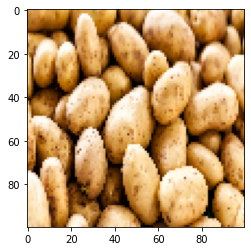

In [28]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('potato.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])